In [125]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

In [126]:
data = load_wine()
X = data.data
y = data.target

In [127]:
X, y = load_wine(return_X_y= True, as_frame = True)

In [128]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [129]:
y.unique()

array([0, 1, 2])

In [130]:
wine = load_wine()
print(wine["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 

In [133]:
model = RandomForestClassifier(random_state=42)

In [134]:
param_grid = {
    "n_estimators": [100, 150, 200],  
    "max_depth": [None, 10, 20, 30],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    "max_features": ["sqrt", "log2", None]

}

In [135]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [136]:
GridSearch = GridSearchCV(model, param_grid = param_grid, cv = kfold, scoring = "accuracy")

In [137]:
GS = GridSearch.fit(X_train, y_train)

In [138]:
print(GridSearch.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


In [139]:
OptModel = model.set_params(**GridSearch.best_params_)

In [140]:
OptModel.fit(X, y)

RandomForestClassifier(random_state=42)

In [141]:
y_pred = OptModel.predict(X)

In [142]:
class_report = classification_report(y, y_pred, target_names = wine.target_names)
print(class_report)

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        59
     class_1       1.00      1.00      1.00        71
     class_2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



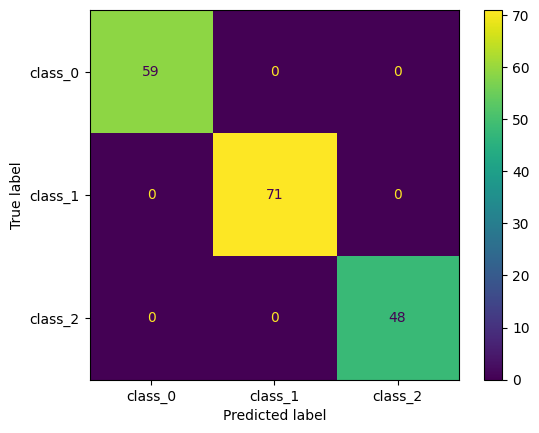

In [143]:
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=wine.target_names)
cm_display.plot()
plt.show()

In [144]:
pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X)

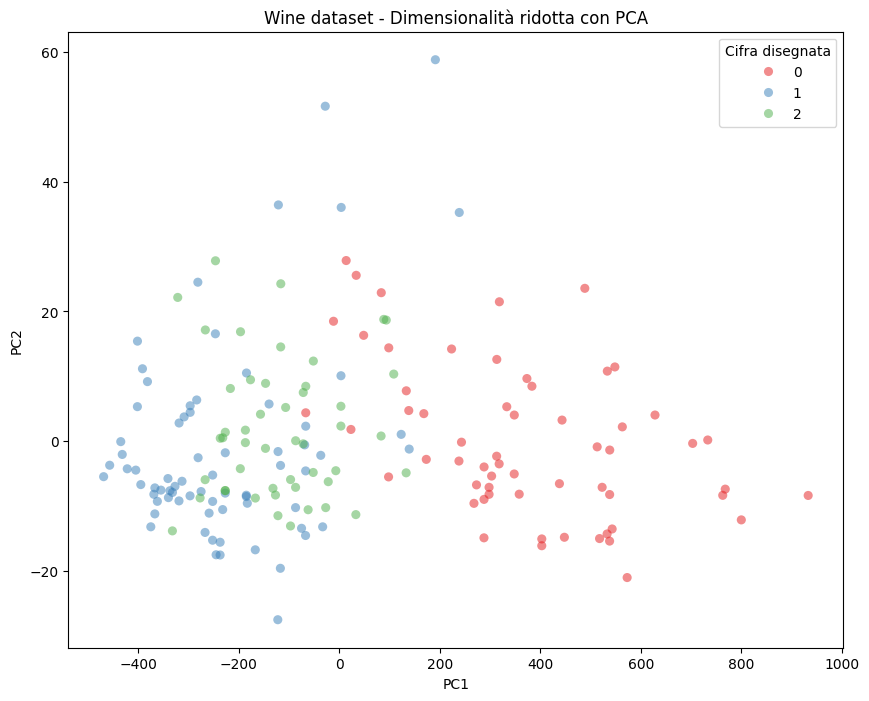

In [154]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set1', s=43, alpha=0.5, linewidth=0)
plt.axis(True)
plt.title('Wine dataset - Dimensionalità ridotta con PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cifra disegnata')
plt.show()